# Quest 2 : Shark Attacks


### Dream Team:

- <em>Karina</em>
- <em>Pollyana</em>
- <em>Salim</em>
- <em>Jules</em>

# Business




Business goal

Hypothesis

The easiest way to get attacked by a shark is by <activity>

Sharks attack more people in <country> than in <country> 

The severity of injuries during a shark attack is positively correlated with higher insurance rates

## <font color='DarkBlue'>I. <ins>Prerequisites</ins>: <font color='blue'></font>

### <font color='MediumBlue'>1 - <ins>Identifying the dataset source</ins>: <font color='violet'></font>

<ins><strong>Data Source: </strong></ins>

In [5]:
sharks = "GSAF5.xls"

In [6]:
source = sharks

### <font color='MediumBlue'>2 - <ins> Importing libraries</ins>: <font color='violet'></font>

<strong>pandas</strong>

In [7]:
import pandas as pd
import numpy as np
import datetime as dt

### <font color='MediumBlue'>3 - <ins>  Loading the dataset into a DataFrame</ins>: <font color='violet'></font>

In [8]:
df = pd.read_excel(source)

##  <font color='DarkBlue'>II. <ins>Exploring the Dataset</ins>: <font color='blue'></font>

### <font color='MediumBlue'>1 - <ins> Dataset Overview</ins>: <font color='violet'></font>

#### <font color='CornflowerBlue'>a) Displaying number of rows and number of columns: </font>

In [9]:
df.shape

(6947, 23)

#### <font color='CornflowerBlue'>b) Glancing at the dataset: </font>

<ins><strong>Displaying the first rows : </strong></ins>

In [12]:
df.head(5)

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,08 Dec-2023,2023.0,Unprovoked,AUSTRALIA,Queensland,1770,Swimming,malle,20s,NaN,...,NaN,"B. Myatt, GSAF",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,04 Dec-2023,2023.0,Unprovoked,BAHAMAS,New Providence Isoad,Sandals Resort,Paddle boarding,Lauren Erickson Van Wart,F,44,...,NaN,"NBC News, 12/4/2023",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,02 Dec-2023,2023.0,Unprovoked,MEXICO,Jalisco,San Patricio Melaque,Swimming,Maria Fernandez Martinez Jimenez,F,26,...,NaN,"News Channel 21, 12/3.2023",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,30 Nov-2023,2023.0,Unprovoked,AUSTRALIA,Queensland,Clack Island,Swimming,Matthew Davitt,M,21,...,1.8m bull shark,"ABC Net, 11/30/2023",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21 Nov-2023,2023.0,Unprovoked,BAHAMAS,Grand Bahama Island,Tiger Beach,Scuba diving,female,F,47,...,NaN,"Eye Witness News, 11/22/2023",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<ins><strong>Displaying names and culumns type : </strong></ins>

In [13]:
df.dtypes

Date               object
Year              float64
Type               object
Country            object
State              object
Location           object
Activity           object
Name               object
Sex                object
Age                object
Injury             object
Unnamed: 11        object
Time               object
Species            object
Source             object
pdf                object
href formula       object
href               object
Case Number        object
Case Number.1      object
original order    float64
Unnamed: 21        object
Unnamed: 22        object
dtype: object

Date               object -> datetime
Year              float64 -> int
Time               object -> datetime


<ins><strong>Displaying number of unique values for each column : </strong></ins>

In [53]:
df.nunique()

Date              5983
Year               258
Type                11
Country            224
State              896
Location          4495
Activity          1585
Name              5669
Sex                  3
Age                165
Injury            4071
Unnamed: 11         12
Time               409
Species           1671
Source            5284
pdf               6789
href formula      6785
href              6776
Case Number       6777
Case Number.1     6775
original order    6797
Unnamed: 21          1
Unnamed: 22          2
dtype: int64

<ins><strong>Displaying number of unique values for each column that has less than 10 distinct values : </strong></ins>

In [15]:
df.nunique()[lambda x: x <= 10]

Sex            9
Unnamed: 21    1
Unnamed: 22    2
dtype: int64

#### <font color='CornflowerBlue'>c) Displaying unique values for each column that has less than 10 distinct value:</font>

In [51]:
dico = {}
for i in range(len(df.columns)):
    if df.nunique()[i] <= 10:
        dico[df.columns[i]] = df.nunique()[i]
        
for j in dico.keys():
    print(j,":",df[j].unique())

Sex : ['unknown' 'F' 'M']
Unnamed: 21 : [nan 'stopped here']
Unnamed: 22 : [nan 'Teramo' 'change filename']


### <font color='MediumBlue'>2 - <ins> Identifying numerical variables and their specifications</ins>: <font color='violet'></font>

<ins><strong><font color='BlueViolet'>Numerical</font></strong> **variables specifications**:</ins>

From the data types output it is safe to assume that the following columns are numerical variables: 
- **Year**: <em><font color='DarkMagenta'> float64</font></em>
- **original order**: <em><font color='DarkMagenta'> float64</font></em>

However, all remaining columns shouldn't be necessary considered as categorical variables.
Indeed, based on the name of the following columns and their values, these are numerical variables in nature:

- **Age**:<font color='red'> should be</font> <em><font color='DarkMagenta'>int</font></em>
- **Date**:<font color='red'> should be</font><em><font color='DarkMagenta'> Date</font></em>
- **Time**:<font color='red'> should be</font><em><font color='DarkMagenta'> Date</font></em>



Additionally, here are the following actions that can be suggested to "fix" some of the data discrepancies:
- Modify "Date" type and format
- Change "Year" type to int
- Deal with missing values such as "Sex"
- Address outliers (?)

#### <font color='CornflowerBlue'>a) Continuous variables: </font>

In [52]:
cont_var = ['age', 'year'] #Age object -> int, Year  float64 -> int 

#### <font color='CornflowerBlue'>b) Discrete variables: </font>

In [18]:
disc_var = ['date','time', 'original order']     # None for this dataset, Time   object -> datetime, Date:  object -> datetime 

#### <font color='CornflowerBlue'>c) All numerical variables: </font>

In [19]:
num_var = disc_var + cont_var

### <font color='MediumBlue'>3 - <ins> Identifying categorical variables and their specifications</ins>: <font color='violet'></font>

<strong><font color='BlueViolet'>Categorical</font></strong> **variables specification**:

- **xxx**: <ins><em><font color='DarkMagenta'>Nominal</font></em></ins>.There is no obvious order for that variable.
- **xx**:<ins><em><font color='DarkMagenta'>Nominal</font></em></ins>.There is no obvious order for that variable.
- **xxx**: <ins><em><font color='DarkMagenta'>Nominal</font></em></ins>. This is a boolean like variable with no particular order. 
- **xxx**: <ins><em><font color='DarkMagenta'>Nominal</font></em></ins>.This is a boolean like variable with no particular order.
- **xxx**: <ins><em><font color='DarkMagenta'>Ordinal</font></em></ins>.Clearly, we can order the level of education, for example by ascending order.



####  <font color='CornflowerBlue'>a) Nominal variables: </font>

In [54]:
nom_var = ['type','country','state','location','activity','name','sex','injury','species','source']

#### <font color='CornflowerBlue'>b) Ordinal variables:</font>

In [21]:
ord_var = []

####  <font color='CornflowerBlue'>c) All categorical variables:</font>

In [22]:
cat_var = nom_var + ord_var

## <font color='DarkBlue'>III. <ins>Analysing Descriptive Statistics</ins>: <font color='blue'></font>

### <font color='MediumBlue'>1 - <ins> Analysing numerical variables</ins>: <font color='violet'></font>

#### <font color='CornflowerBlue'>a) Measuring Central Tendencies: <font color='violet'></font> 

#### i) <font color='ForestGreen'>Mean</font>

In [23]:
df[num_var].mean().round(2)

Series([], dtype: float64)

#### ii)  <font color='ForestGreen'>Median</font>

In [24]:
df[num_var].median()

Series([], dtype: float64)

#### iii)  <font color='ForestGreen'>Mode</font>

In [25]:
df[num_var].mode()

""


**Findings on central tendencies**

Based on our calculations and interpretations of central measures, we can make the following observations:

 

#### <font color='CornflowerBlue'>b) Measuring Dispersion:</font> 

#### i) <font color='ForestGreen'>Standard Deviation</font>

In [26]:
df[num_var].std().round(2)

Series([], dtype: float64)

* **xxxx**: The Standard Deviation blablabla



#### ii) <font color='ForestGreen'>Range</font>

In [27]:
df[num_var].max() - df[num_var].min()

Series([], dtype: float64)

#### <font color='CornflowerBlue'>c)  Summarizing Statistics:</font> 

#### <font color='ForestGreen'> i) Statistics Summary: count, mean, standard deviation, min, quartiles, maximum</font>

In [28]:
#df[num_var].describe().round(2)

In [48]:
#Karina - Age - inconsistent representation

df['Age'].isna().any() #if there is any null values in Age column

True

In [49]:
df['Age'].isna().sum() #number of null values

4987

In [50]:
print(df['Age'].unique()) #check unique values

[nan '44' '26' '21' '47' '32' '66' '55' '30' '59' '8' '50' '52' '45' '64'
 '34' '38' '30s' '37' '9' '19' '20/30' '35' '65' '22' '20s' '77' '60' '49'
 '42' '15' '!2' '24' '73' '25' '18' '20' '46' '13' '50s' '39' '11' '58'
 '67' '10' '14' '6' '41' '16' '53' '68' '43' '29' '40' '51' '17' '31'
 '40s' 'teen' 'Teen' 'M' '!6' '!!' '45 and 15' '28 & 22' '22, 57, 31'
 '60s' "20's" '9 & 60' 'a minor' '23' '12' '36' '63' '71' '48' '70'
 '18 months' '57' '7' '28' '33' '61' '74' '27' '3' '56' '28 & 26' '62' '5'
 '54' '86' '18 or 20' '12 or 13' '46 & 34' '28, 23 & 30' 'Teens' '36 & 26'
 '8 or 10' '\xa0 ' ' ' '30 or 36' '6½' '21 & ?' '33 or 37' 'mid-30s'
 '23 & 20' ' 30' '7      &    31' ' 28' '20?' "60's" '69' '32 & 30'
 '16 to 18' '87' 'Elderly' 'mid-20s' 'Ca. 33' '74 ' '45 ' '21 or 26' '20 '
 '>50' '18 to 22' 'adult' '9 & 12' '? & 19' '9 months' '25 to 35'
 '23 & 26' '(adult)' '33 & 37' '25 or 28' '37, 67, 35, 27,  ? & 27'
 '21, 34,24 & 35' '30 & 32' '50 & 30' '17 & 35' 'X' '"middle-age"'
 '13 or 

In [33]:
pattern = r'[^0-9.]'
df['Age'] = df['Age'].str.replace(pattern, '')
print(df['Age'].unique())

[nan '44' '26' '21' '47' '32' '66' '55' '30' '59' '8' '50' '52' '45' '64'
 '34' '38' '30s' '37' '9' '19' '20/30' '35' '65' '22' '20s' '77' '60' '49'
 '42' '15' '!2' '24' '73' '25' '18' '20' '46' '13' '50s' '39' '11' '58'
 '67' '10' '14' '6' '41' '16' '53' '68' '43' '29' '40' '51' '17' '31'
 '40s' 'teen' 'Teen' 'M' '!6' '!!' '45 and 15' '28 & 22' '22, 57, 31'
 '60s' "20's" '9 & 60' 'a minor' '23' '12' '36' '63' '71' '48' '70'
 '18 months' '57' '7' '28' '33' '61' '74' '27' '3' '56' '28 & 26' '62' '5'
 '54' '86' '18 or 20' '12 or 13' '46 & 34' '28, 23 & 30' 'Teens' '36 & 26'
 '8 or 10' '\xa0 ' ' ' '30 or 36' '6½' '21 & ?' '33 or 37' 'mid-30s'
 '23 & 20' ' 30' '7      &    31' ' 28' '20?' "60's" '69' '32 & 30'
 '16 to 18' '87' 'Elderly' 'mid-20s' 'Ca. 33' '74 ' '45 ' '21 or 26' '20 '
 '>50' '18 to 22' 'adult' '9 & 12' '? & 19' '9 months' '25 to 35'
 '23 & 26' '(adult)' '33 & 37' '25 or 28' '37, 67, 35, 27,  ? & 27'
 '21, 34,24 & 35' '30 & 32' '50 & 30' '17 & 35' 'X' '"middle-age"'
 '13 or 

In [35]:
#We have 4987 NaN values out of a total of 6923 rows in the 'Age' column, it indicates that a significant portion
#of the data is missing and 

### <font color='MediumBlue'>2 - <ins> Analysing categorical variables</ins>: <font color='violet'></font>

#### <font color='CornflowerBlue'>a) Measuring Frequency: </font>

#### <font color='ForestGreen'> i) frequency in counts</font>

In [36]:
for k in cat_var:
    print(f"{df[k].value_counts()} \n")    

#### <font color='ForestGreen'> ii) frequency in percentages</font>

In [37]:
for k in cat_var:
    percentage = (df[k].value_counts() / df.shape[0]) * 100
    print(f"{percentage} \n ")

In [38]:
df["Sex"].unique()

array(['20s', 'F', 'M', nan, ' M', 'M ', 'lli', 'M x 2', 'N', '.'],
      dtype=object)

In [39]:
df["Sex"] = df["Sex"].str.replace(" ", "").str.replace("Mx2", "M")

In [40]:
df["Sex"] = df["Sex"].apply(lambda x: x if (x =='F' or  x =='M') else "unknown")

In [41]:
df["Sex"].unique()

array(['unknown', 'F', 'M'], dtype=object)

df.nunique()[lambda x: x <= 10]

In [42]:
#Karina - duplicates

df.duplicated().sum()

24

In [43]:
duplicate_rows = df[df.duplicated(keep=False)]
print(duplicate_rows)

     Date  Year Type Country State Location Activity Name      Sex  Age  ...  \
6922  NaN   NaN  NaN     NaN   NaN      NaN      NaN  NaN  unknown  NaN  ...   
6923  NaN   NaN  NaN     NaN   NaN      NaN      NaN  NaN  unknown  NaN  ...   
6924  NaN   NaN  NaN     NaN   NaN      NaN      NaN  NaN  unknown  NaN  ...   
6925  NaN   NaN  NaN     NaN   NaN      NaN      NaN  NaN  unknown  NaN  ...   
6926  NaN   NaN  NaN     NaN   NaN      NaN      NaN  NaN  unknown  NaN  ...   
6927  NaN   NaN  NaN     NaN   NaN      NaN      NaN  NaN  unknown  NaN  ...   
6928  NaN   NaN  NaN     NaN   NaN      NaN      NaN  NaN  unknown  NaN  ...   
6929  NaN   NaN  NaN     NaN   NaN      NaN      NaN  NaN  unknown  NaN  ...   
6930  NaN   NaN  NaN     NaN   NaN      NaN      NaN  NaN  unknown  NaN  ...   
6931  NaN   NaN  NaN     NaN   NaN      NaN      NaN  NaN  unknown  NaN  ...   
6932  NaN   NaN  NaN     NaN   NaN      NaN      NaN  NaN  unknown  NaN  ...   
6933  NaN   NaN  NaN     NaN   NaN      

In [44]:
#we have 25 NaA rows out of 6947, so it could be considered as safe to drop them - needs verification

df.drop_duplicates(inplace=True)
df.shape

(6923, 23)

In [45]:
#Karina - Null values (Unnamed: 21, Unnamed: 22 - removed)
df.isna().sum()

Date                 1
Year                 3
Type                19
Country             51
State              482
Location           565
Activity           586
Name               220
Sex                  0
Age               4987
Injury              36
Unnamed: 11        562
Time              3523
Species           3129
Source              20
pdf                124
href formula       128
href               127
Case Number        125
Case Number.1      126
original order     124
Unnamed: 21       6922
Unnamed: 22       6921
dtype: int64

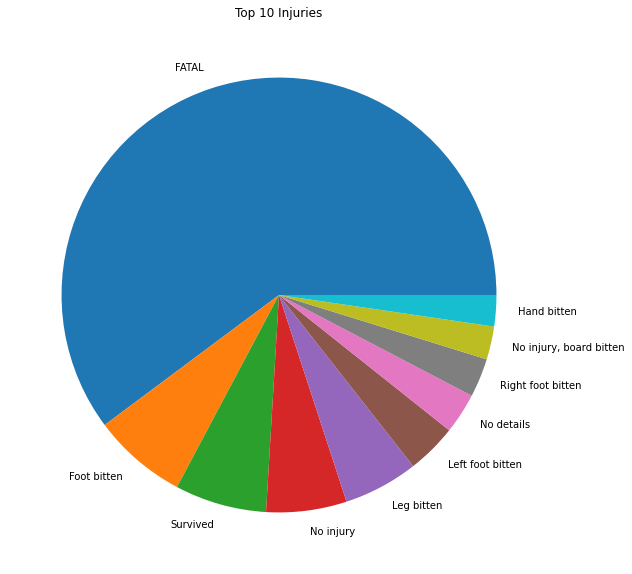

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.pie(df.Injury.value_counts().head(10), labels = df.Injury.value_counts().head(10).index)
plt.title('Top 10 Injuries')
plt.show()

In [11]:
# Top 2 lcoations with most injuries:

k = 0
l = 0
for i in list(df.Location):
    if "Volusia County" in str(i):
        k += 1
    elif "Brevard County" in str(i):
        l += 1
print(f"Volusia Country: {k} \nBrevard County: {l}")

# Volusia County: 352
# Brevard County: 100

Volusia Country: 352 
Brevard County: 100
